## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Лабораторная работа №5

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

df = np.load('05_visualization_data/average_ratings.npy')

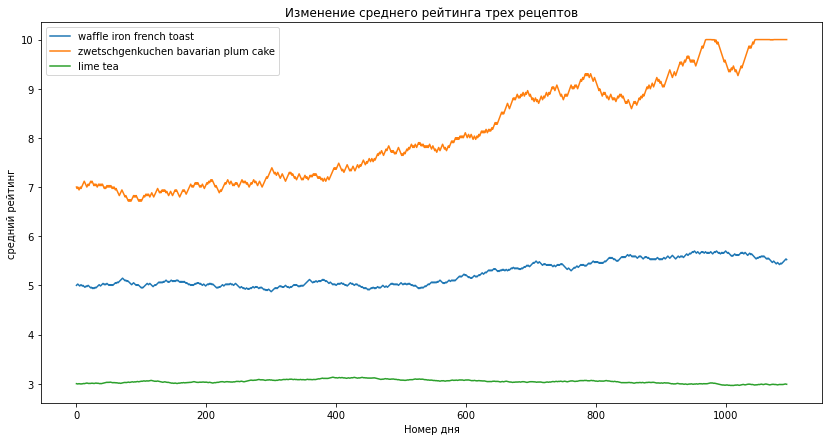

In [3]:
fig, axes = plt.subplots(1, 1)

axes.plot(df[0], label = 'waffle iron french toast')
axes.plot(df[1], label = 'zwetschgenkuchen bavarian plum cake')
axes.plot(df[2], label = 'lime tea')


axes.set_title('Изменение среднего рейтинга трех рецептов')
axes.set_xlabel('Номер дня')
axes.set_ylabel('средний рейтинг')
axes.legend()
fig.set_figheight(7)
fig.set_figwidth(14)

plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


In [4]:
import pandas as pd
import matplotlib.dates as mdates
dates = pd.date_range(start='1/1/2019', end='12/30/2021')

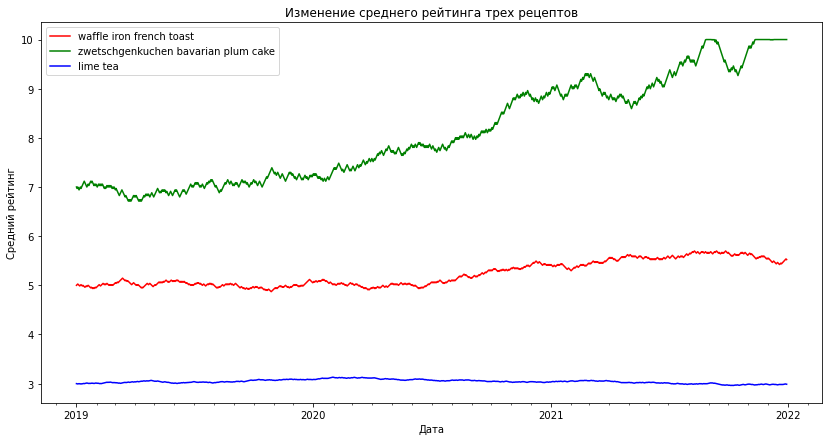

In [5]:
fig, axes = plt.subplots(1, 1)

axes.plot(dates, df[0], label = 'waffle iron french toast', color = 'red')
axes.plot(dates, df[1], label = 'zwetschgenkuchen bavarian plum cake', color = 'green')
axes.plot(dates, df[2], label = 'lime tea', color = 'blue')


axes.set_title('Изменение среднего рейтинга трех рецептов')
axes.set_xlabel('Дата')
axes.set_ylabel('Средний рейтинг')
axes.legend()
axes.xaxis.set_major_locator(mdates.YearLocator())
axes.xaxis.set_minor_locator(mdates.MonthLocator())
fig.set_figheight(7)
fig.set_figwidth(14)

plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

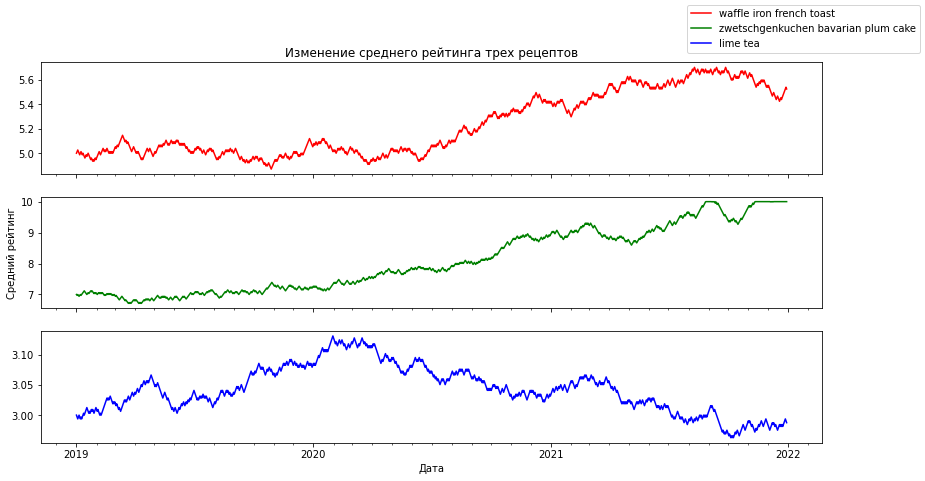

In [6]:
fig, axes = plt.subplots(3, 1,sharex=True)


axes[0].plot(dates, df[0], label = 'waffle iron french toast', color = 'red')
axes[1].plot(dates, df[1], label = 'zwetschgenkuchen bavarian plum cake', color = 'green')
axes[2].plot(dates, df[2], label = 'lime tea', color = 'blue')


axes[0].set_title('Изменение среднего рейтинга трех рецептов')
axes[2].set_xlabel('Дата')
axes[1].set_ylabel('Средний рейтинг')

axes[0].xaxis.set_minor_locator(mdates.MonthLocator())

axes[1].xaxis.set_minor_locator(mdates.MonthLocator())

axes[2].xaxis.set_major_locator(mdates.YearLocator())
axes[2].xaxis.set_minor_locator(mdates.MonthLocator())


fig.set_figheight(7)
fig.set_figwidth(14)
fig.legend()
plt.show()


4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [7]:
visitors = np.load('05_visualization_data/visitors.npy')


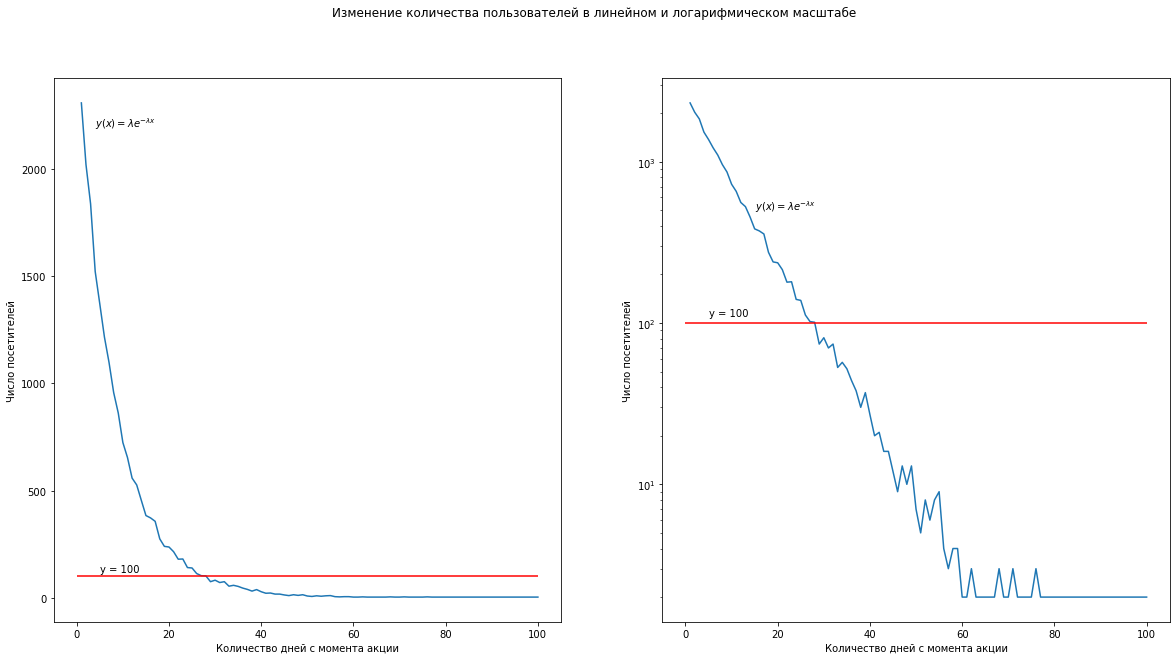

In [8]:
fig, axes = plt.subplots(1,2)

axes[0].plot([i+1 for i in range(100)],visitors)
axes[0].text(4,2200,"$y(x)=\lambda e^{-\lambda x}$")
axes[0].hlines(100, 0, 100, color = 'red')
axes[0].text(5,120,"y = 100")
axes[0].set_ylabel('Число посетителей')
axes[0].set_xlabel('Количество дней с момента акции')

axes[1].set_yscale("log")
axes[1].plot([i+1 for i in range(100)], visitors)
axes[1].text(15,500,"$y(x)=\lambda e^{-\lambda x}$")
axes[1].hlines(100, 0, 100, color = 'red')
axes[1].text(5,110,"y = 100")
axes[1].set_ylabel('Число посетителей')
axes[1].set_xlabel('Количество дней с момента акции')

fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')
fig.set_figheight(10)
fig.set_figwidth(20)

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [9]:
recipes = pd.read_csv('05_visualization_data/recipes_sample.csv',
                       parse_dates = [4])

reviews = pd.read_csv('05_visualization_data/reviews_sample.csv', 
                      index_col = 0,    
                      parse_dates = [3])

In [10]:
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [11]:
ex = recipes[['minutes', 'n_steps']].dropna()

In [12]:
def check_type(x):
    if x < 5:
        return 'Короткий'
    elif x >= 50:
        return 'Длинный'
    else:
        return 'Средний'
ex['type'] = ex['n_steps'].map(lambda x: check_type(x))

In [13]:
group_1 = ex.groupby('type')['n_steps'].count()

In [14]:
group_2 = ex.groupby('type')['n_steps'].mean()

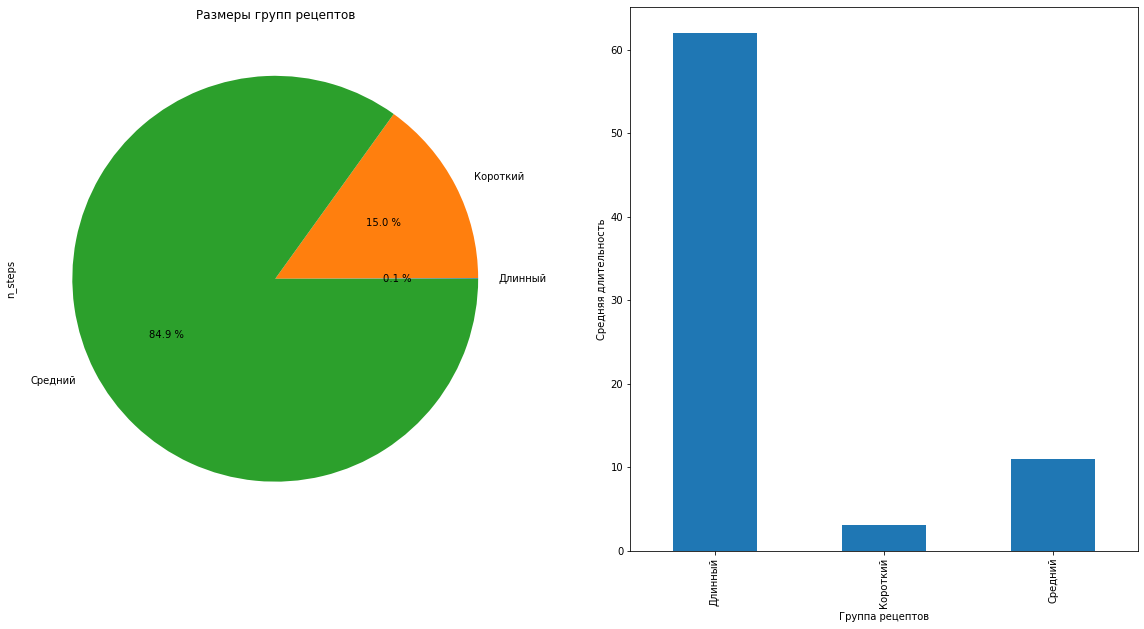

In [20]:
fig, axes = plt.subplots(1,2)



group_1.plot.pie(ax=axes[0],
                 autopct =lambda x:f'{round(x,1)} %',
                 title='Размеры групп рецептов')

group_2.plot.bar(ax=axes[1])
axes[1].set_ylabel('Средняя длительность')
axes[1].set_xlabel('Группа рецептов')


fig.set_figheight(10)
fig.set_figwidth(20)

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [21]:
reviews_08 = reviews[reviews['date'].dt.year == 2008]['rating']
reviews_09 = reviews[reviews['date'].dt.year == 2009]['rating']

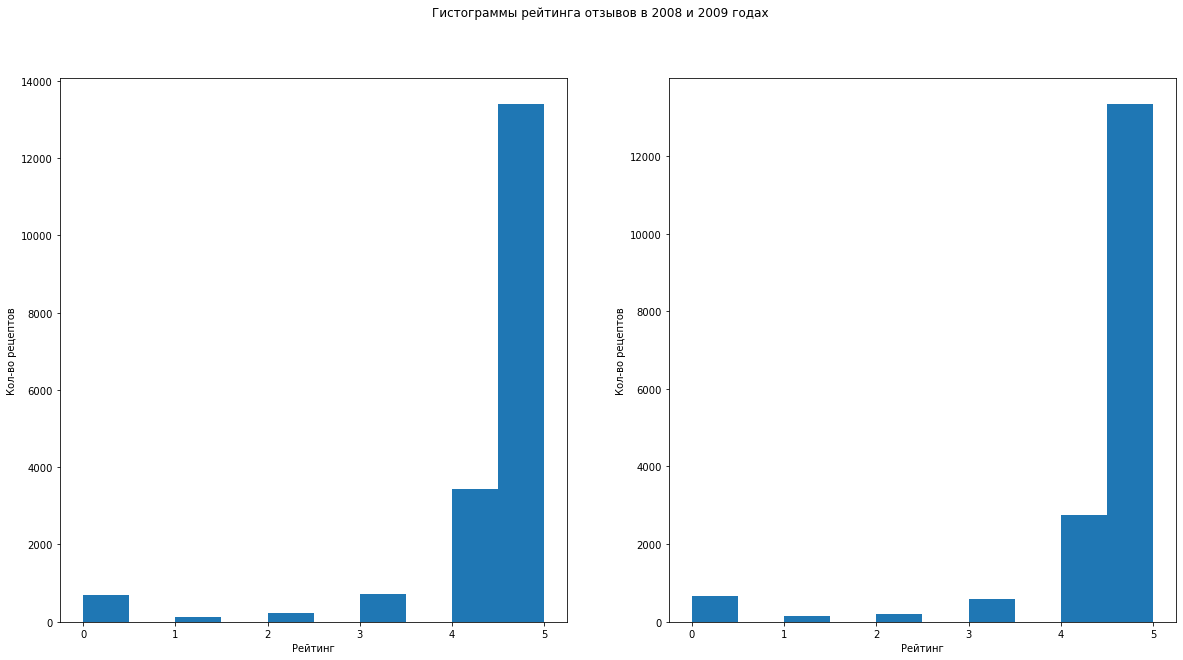

In [22]:
fig, axes = plt.subplots(1,2)



reviews_08.plot.hist(ax=axes[0])
reviews_09.plot.hist(ax=axes[1])

plt.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')
axes[0].set_xlabel('Рейтинг')
axes[0].set_ylabel('Кол-во рецептов')
axes[1].set_xlabel('Рейтинг')
axes[1].set_ylabel('Кол-во рецептов')

fig.set_figheight(10)
fig.set_figwidth(20)

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

In [23]:
import seaborn as sns

In [24]:
ex = recipes[['n_steps', 'n_ingredients']].dropna()
ex['type'] = ex['n_steps'].map(lambda x: check_type(x))

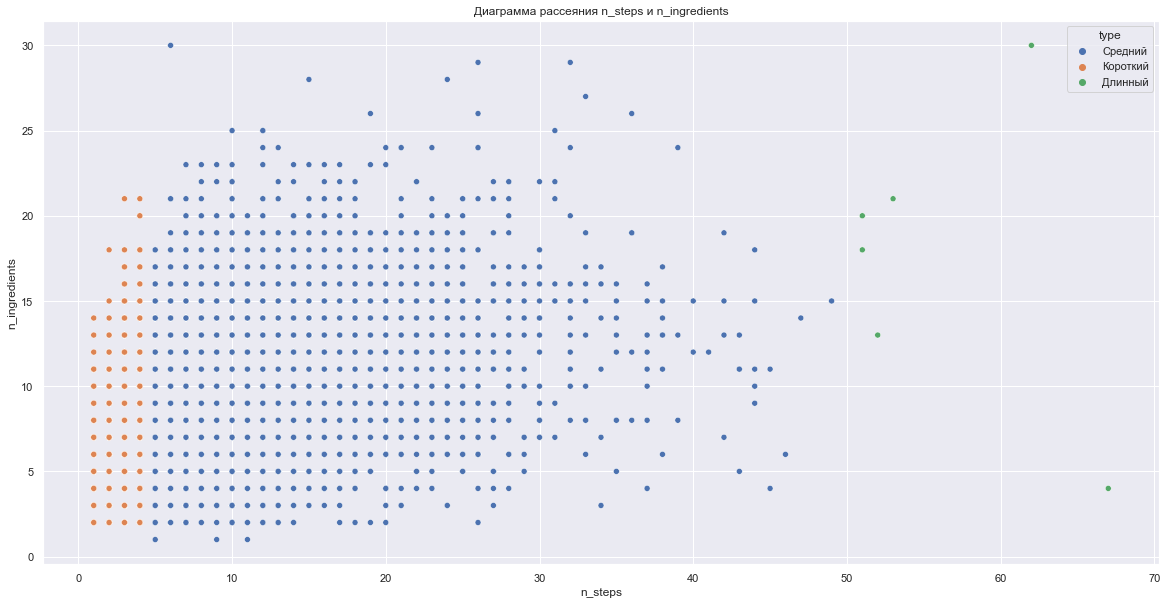

In [26]:
sns.scatterplot(data = ex, x='n_steps', y='n_ingredients', hue = 'type')
sns.set(rc={'figure.figsize':(20,10)})
plt.title("Диаграмма рассеяния n_steps и n_ingredients")
plt.show()

Линейной зависимости не наблюдается 

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [27]:
# поставил -1 +1, чтобы обратная кореляция тоже выделялась

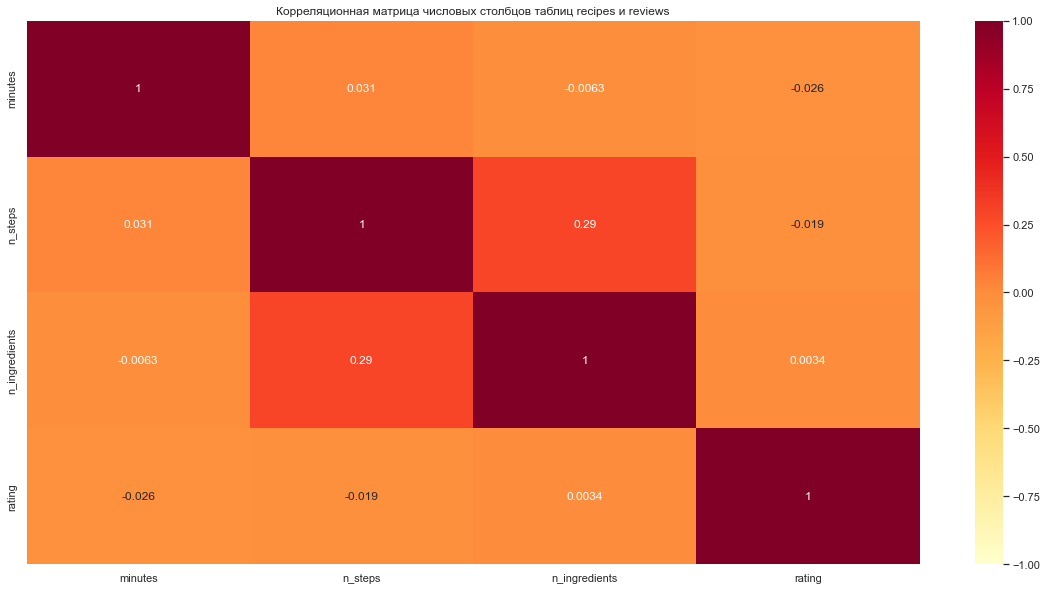

In [28]:
Merge_df = recipes.merge(reviews, left_on = 'id', right_on = 'recipe_id', how = 'right')\
            [[ "minutes", "n_steps", "n_ingredients", "rating"]]

sns.heatmap(Merge_df.corr(),annot = True, vmin = -1, vmax = +1,  cmap = 'YlOrRd')
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')
plt.show()